In [1]:
#Imporitng libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pylab import rcParams
sns.set()
rcParams["figure.figsize"] = (10, 6)

In [2]:
#Loading the Dataset
df = pd.read_csv('Car details v3.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.shape

(8128, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,8128.0,2013.804011,4.044249,1983.0,2011.0,2015.0,2017.0,2020.0
selling_price,8128.0,638271.807702,806253.403508,29999.0,254999.0,450000.0,675000.0,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,35000.0,60000.0,98000.0,2360457.0
seats,7907.0,5.416719,0.959588,2.0,5.0,5.0,5.0,14.0


## EDA

In [7]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [8]:
df.engine.unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [9]:
df.mileage.unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

In [39]:
df.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [10]:
#Droping unnecessary columns
df.drop(columns = ["seats", "torque", "max_power"], inplace=True)

torque can be defined as an engine's 'pulling force' and helps a vehicle with initial acceleration.
This is why heavier vehicles like SUVs often use engines that deliver a high amount.

max power determines the rate of the acceleration of the vehicle.

So basically both depends on engine. So we can can drop these and move ahead with engine feature.

In [11]:
# For now let's make NaN value as 0 in mileage and engine column

df.fillna(0, inplace=True)

In [12]:
# let's see the data where mileage value and engine values are 0

df.loc[df.mileage == 0].head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,0,0
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,0,0
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,0,0
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,0,0
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,0,0


- we can see that Car company and name are same but car version are differnce
- we can replace that 0 mileage value with mean value of same care name's mileage value
- we can replace that 0 engine value with median value of same care name's engine value

In [13]:
# let's split the numeric values from mileage and engine and convert it into float or int

df.mileage = df.mileage.apply(lambda x: float(str(x).split()[0]))
df.engine = df.engine.apply(lambda x: int(str(x).split()[0]))
df.sample(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine
4703,Toyota Etios Liva GD,2012,400000,107500,Diesel,Individual,Manual,Second Owner,0.00,0
2230,Mahindra Verito 1.5 D4 BSIV,2014,250000,50000,Diesel,Individual,Manual,Second Owner,21.03,1461


In [14]:
# let's separate company and car name from name column

df["comp_car_name"] = df.name.apply(lambda x: str(x).split()[0] + " " + str(x).split()[1])
df.sample(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
2413,Chevrolet Captiva 2.2 LTZ AWD,2012,700000,50000,Diesel,Individual,Automatic,Second Owner,12.12,2231,Chevrolet Captiva
2075,Tata New Safari DICOR 2.2 EX 4x2,2011,350000,156000,Diesel,Individual,Manual,First Owner,11.57,2179,Tata New


In [15]:
# let's check how many records have 0 mileage values

len(df.loc[df.mileage == 0])


238

In [16]:
# now let's fill the mileage value with mean value of same car name's mileage values wherever it has 0 value

dropable_index = []
for i in df.loc[df.mileage == 0].index:
    missing_mileage_car_name = df.loc[i, "comp_car_name"]
    avg_mileage = df.loc[(df.name.str.contains(missing_mileage_car_name)) & (df.mileage !=0), "mileage"].mean()
    if np.nan is avg_mileage:
        # here if mean value is nan then it means in our data set there are no other same company name car available
        # so for that we have one option we have to drop that records
        dropable_index.append(i)
    else:
        df.loc[i, "mileage"] = avg_mileage

# let's drop those records which i did not able to fill the mileage value because that car name was unique
df.drop(dropable_index, axis=0, inplace=True)
df.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
7415,Hyundai EON 1.0 Kappa Magna Plus Optional,2018,350000,10000,Petrol,Individual,Manual,Second Owner,20.3,998,Hyundai EON
98,Maruti Alto LX BSIII,2008,120000,68000,Petrol,Dealer,Manual,Third Owner,19.7,796,Maruti Alto
1123,Honda Jazz VX,2016,550000,56494,Petrol,Trustmark Dealer,Manual,First Owner,18.2,1199,Honda Jazz


In [17]:
# let's see how many records have 0 value in engine column

len(df.loc[df.engine == 0])

200

In [18]:
# now let's fill the engine value with median value of same car name's engine value wherever engine value is 0

for i in df.loc[df.engine == 0].index:
    missing_engine_car_name = df.loc[i, "comp_car_name"]
    median_engine = df.loc[(df.name.str.contains(missing_engine_car_name)) & (df.engine != 0), "engine"].median()
    
    df.loc[i, "engine"] = median_engine

df.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
5846,Volkswagen Polo GT TSI BSIV,2014,575000,28100,Petrol,Dealer,Automatic,First Owner,19.529733,1197.0,Volkswagen Polo
7283,Hyundai i20 2015-2017 Sportz 1.4 CRDi,2014,484999,70100,Diesel,Dealer,Manual,First Owner,22.540000,1396.0,Hyundai i20
7141,Maruti Swift ZXI,2013,320000,60000,Petrol,Individual,Manual,Fourth & Above Owner,18.600000,1197.0,Maruti Swift


## Exploring Name Feature

In [20]:
# let's find unique values of name columns

df.name.nunique()

2043

##### Observation:
- we have 2043 unique car

## Exploring Years Feature

In [21]:
# let's find unique values of year columns

df.year.unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2019, 2003, 2008, 2020, 1999, 2000, 2004,
       1994, 1998, 1997, 1995, 1996, 1991], dtype=int64)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


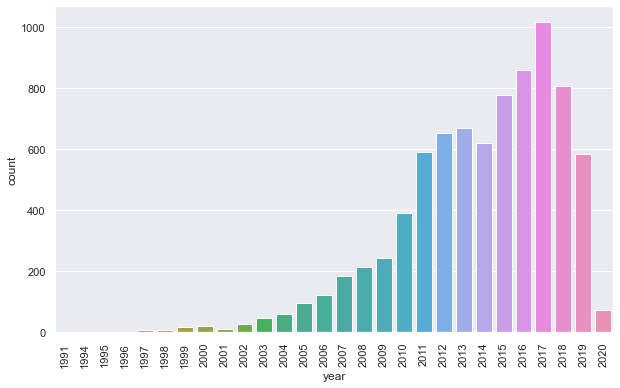

In [22]:
# let's plot it using count plot it see the variation of years
sns.countplot(df.year)
plt.xticks(rotation=90)
plt.show()

##### Observation:
- We have cars from year 1983 to 2020

## Exploring Km Driven Feature

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='km_driven', ylabel='Density'>

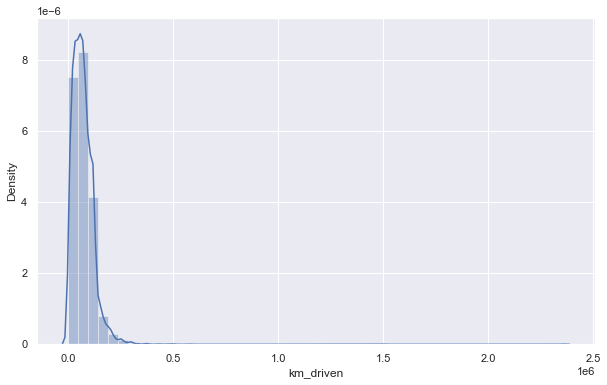

In [23]:
# let's see the data distribution of km_driven

sns.distplot(df.km_driven)

In [24]:
# let's see min and max value

print("Minimum Km Driven:", df.km_driven.min())
print("Maximum Km Driven:", df.km_driven.max())

Minimum Km Driven: 1
Maximum Km Driven: 2360457


##### Observation:
- Our Km Driven data is right skewed but it's okay some cars are old so it covers more Km

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


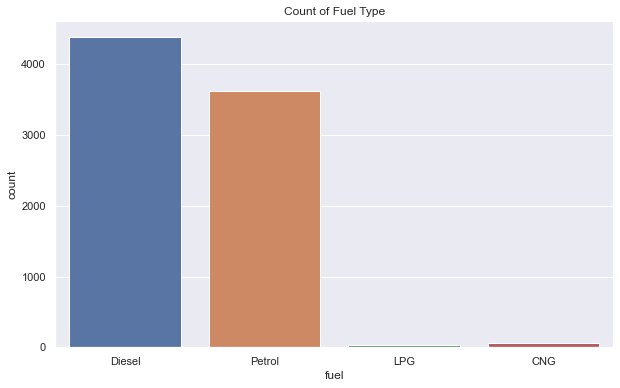

In [25]:
# let's see the variation of fuel type

sns.countplot(df.fuel)
plt.title("Count of Fuel Type")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


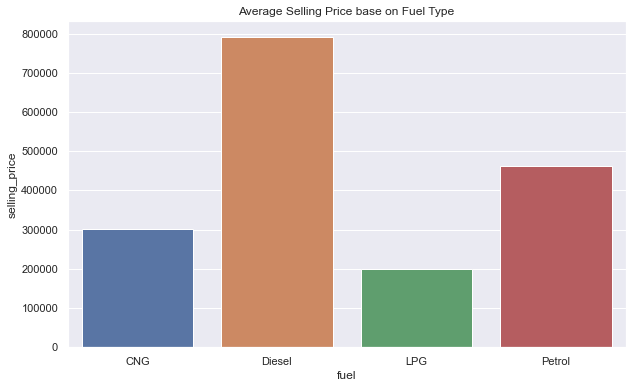

In [26]:
# Let's find avg price of the car according to it's fuel type

avg_fuel_selling_price = df.groupby("fuel").selling_price.mean().reset_index()
sns.barplot(avg_fuel_selling_price.fuel, avg_fuel_selling_price.selling_price)
plt.title("Average Selling Price base on Fuel Type")
plt.show()

##### Observation:
- Maximum cars  run on Diesel and Petrol fuel and some are on LPG and CNG
- The cars which has Diesel fuel type it's selling price is high 
- so Fuel type is affect to selling price

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


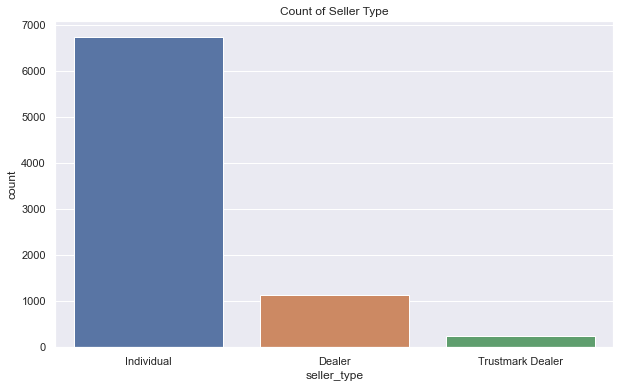

In [27]:
## let's look at seller_type 

sns.countplot(df.seller_type)
plt.title("Count of Seller Type")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


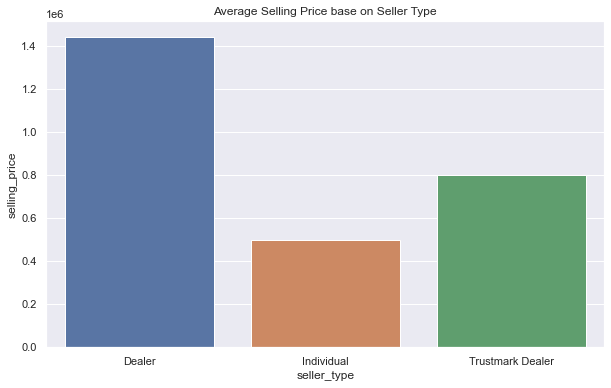

In [28]:
# let's see seller_type feature affect on selling price or not

avg_seller_type_selling_price = df.groupby("seller_type").selling_price.mean().reset_index()

sns.barplot(avg_seller_type_selling_price.seller_type, avg_seller_type_selling_price.selling_price)
plt.title("Average Selling Price base on Seller Type")
plt.show()

##### Observation:

- Selling Price is high when seller type are Dealer and Trustmark Dealer
- so Seller Type is  affecting Selling Price

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


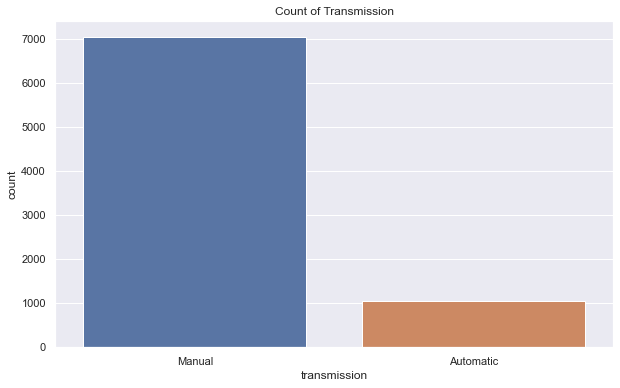

In [29]:
# let's look at transmission types

sns.countplot(df.transmission)
plt.title("Count of Transmission")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


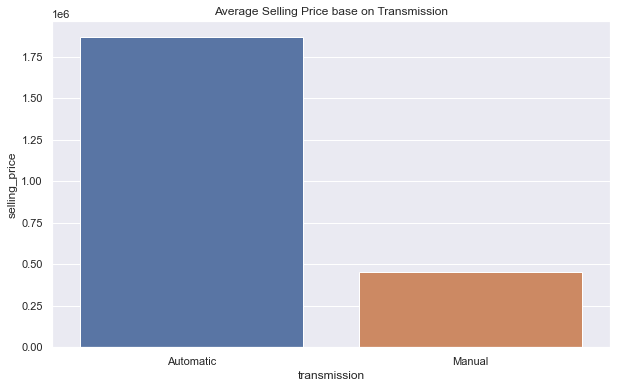

In [30]:
# let's see the average selling price manual and automatic transmission

avg_transmission_selling_price = df.groupby("transmission").selling_price.mean().reset_index()

sns.barplot(avg_transmission_selling_price.transmission, avg_transmission_selling_price.selling_price)
plt.title("Average Selling Price base on Transmission")
plt.show()

##### Observation:

- The Selling price of an automatic transmission are high than manual transmission
- so here transmission types also  affect selling price

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


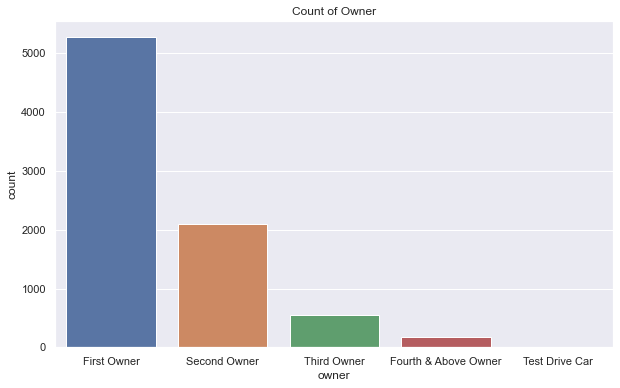

In [31]:
# let's look at owner category

sns.countplot(df.owner)
plt.title("Count of Owner")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


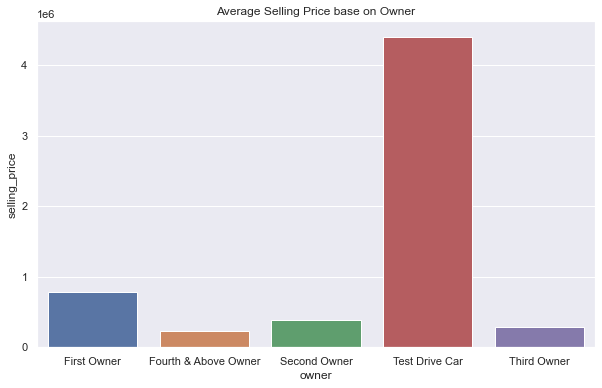

In [32]:
# let's see the average selling price base on owner

avg_owner_selling_price = df.groupby("owner").selling_price.mean().reset_index()

sns.barplot(avg_owner_selling_price.owner, avg_owner_selling_price.selling_price)
plt.title("Average Selling Price base on Owner")
plt.show()

In [33]:
# Average selling price of owner type test drive car is very high it might be an outlier let's see the data
# which have owner type is Test Drive Car

df.loc[df.owner == "Test Drive Car"]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,comp_car_name
4383,Volkswagen Vento 1.5 TDI Highline BSIV,2019,1350000,5400,Diesel,Dealer,Manual,Test Drive Car,22.27,1498.0,Volkswagen Vento
4950,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,Audi A6
4951,Audi A6 35 TFSI Matrix,2019,5923000,11500,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,Audi A6
4952,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,Audi A6
6220,Honda Civic ZX,2019,2000000,24857,Petrol,Dealer,Automatic,Test Drive Car,16.50,1799.0,Honda Civic


- Here we can see the cars which belongs to Test Drive Car category of owner are unique models
- Owner Type Test Drive Car are 5 records and 3 unique model so we can easily drop it to remove that outlier

In [34]:
# let's drop records which has Test Drive Car owner type

df.drop(df.loc[df.owner == "Test Drive Car"].index, axis=0, inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


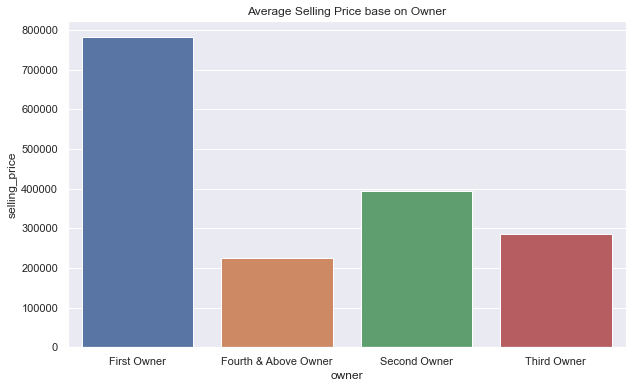

In [35]:
# now again let's see the average selling price base on owner

avg_owner_selling_price = df.groupby("owner").selling_price.mean().reset_index()

sns.barplot(avg_owner_selling_price.owner, avg_owner_selling_price.selling_price)
plt.title("Average Selling Price base on Owner")
plt.show()

##### Observation:
- We have more cars from first owner
- The car selling price is more when owner is first compare to other owner
- so here owner feature is affect to selling price

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


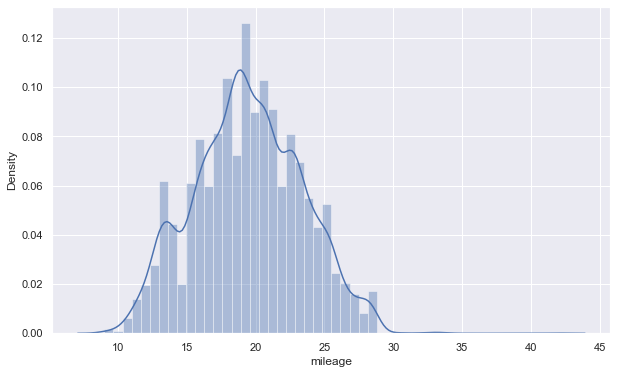

In [36]:
# let's look the data distribution of mileage column

sns.distplot(df.mileage)
plt.show()

##### Observation:
- Here mileage data are noramlly distributed so our regression model will perform better on normal distribution data
- Mileage feature is important for car so it is affect on selling price

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


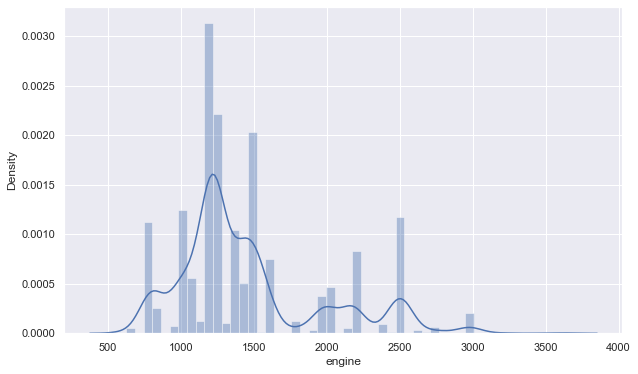

In [37]:
# let's look at engine

sns.distplot(df.engine)
plt.show()

In [38]:
df[["engine", "selling_price"]].corr()

,engine,selling_price
engine,1.000000,0.458291
selling_price,0.458291,1.000000


##### Observation:
- The data of engine is not normally distributed but engine plays a important role in cars
- We can see engine is highly co-related with selling price.